In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import dstack
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier

subjectTrain = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header = None)
trainActivity = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header = None)
bodyAccx = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', header = None, delim_whitespace = True)
bodyAccy = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', header = None, delim_whitespace = True)
bodyAccz = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', header = None, delim_whitespace = True)
bodyGyrox = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', header = None, delim_whitespace = True)
bodyGyroy = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt', header = None, delim_whitespace = True)
bodyGyroz = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt', header = None, delim_whitespace = True)
totalAccx = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', header = None, delim_whitespace = True)
totalAccy = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', header = None, delim_whitespace = True)
totalAccz = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', header = None, delim_whitespace = True)

X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header = None, delim_whitespace = True)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header = None, delim_whitespace = True)

activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', header = None, delim_whitespace = True)

def loadingsingle(filepath):
    df = pd.read_csv(filepath, delim_whitespace = True, header = None)
    return df.values
def loadinggroup(filenames,prefix = ''):
    loaded = list()
    for name in filenames:
        data = loadingsingle(prefix + name)
        loaded.append(data)
        
    loaded = dstack(loaded)
    return loaded

def loadingdataset(group, prefix = ''):
    filepath = prefix + group + '/Inertial Signals/'
    
    filenames = list()
    
    filenames += ['body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt']    
    filenames += ['total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt']
    filenames += ['body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt']    
    
    X = loadinggroup(filenames,filepath)
    y = loadingsingle(prefix + group + '/y_' + group + '.txt')
    return X,y
trainx, trainy = loadingdataset('train', 'C:/Users/rober/OneDrive/Desktop/FALL22/COSC3337/HomeworkTasks/Task3/UCI HAR Dataset/')
testx, testy = loadingdataset('test', 'C:/Users/rober/OneDrive/Desktop/FALL22/COSC3337/HomeworkTasks/Task3/UCI HAR Dataset/')

SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

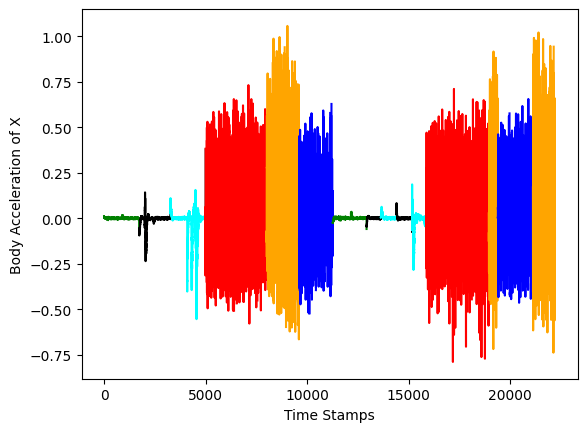

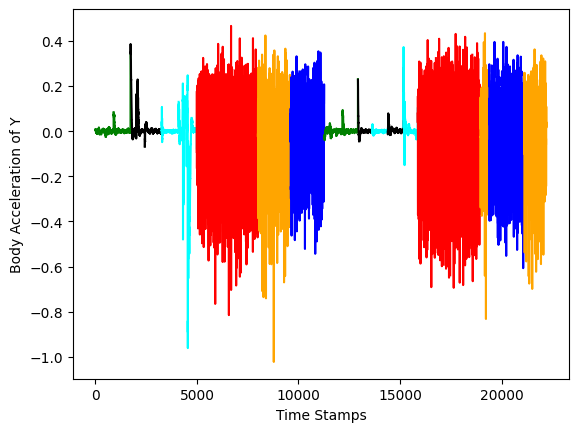

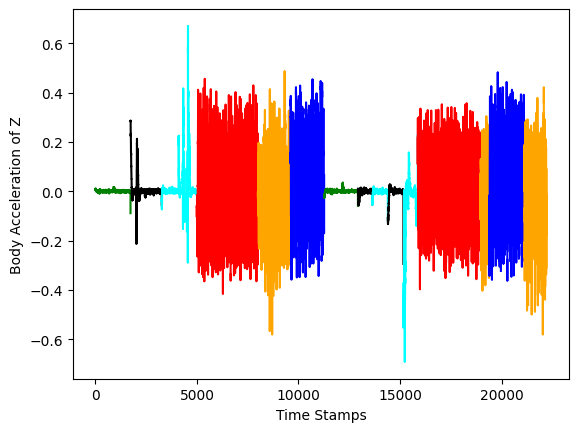

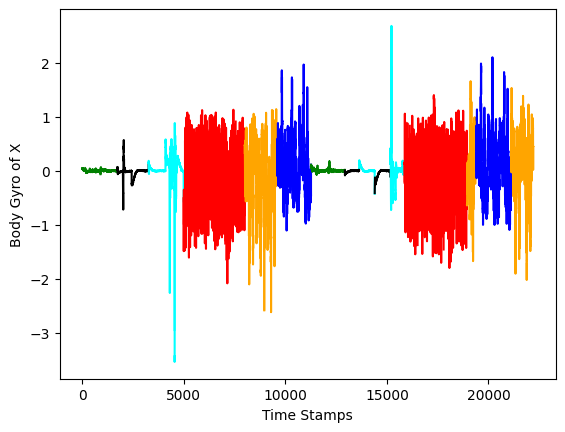

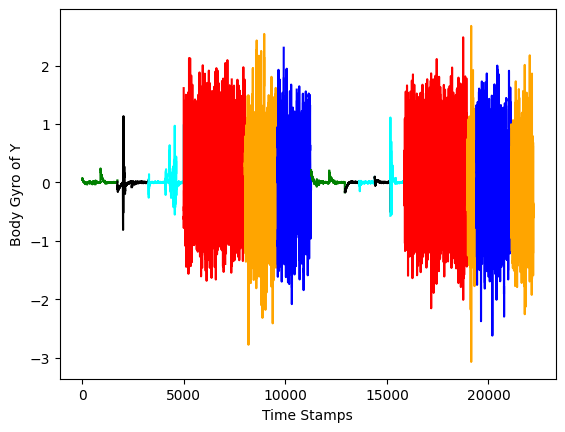

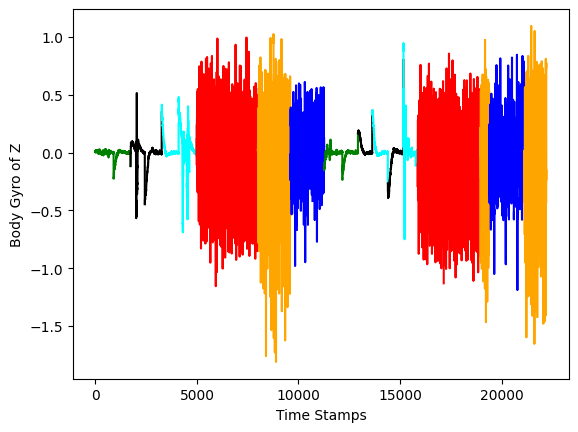

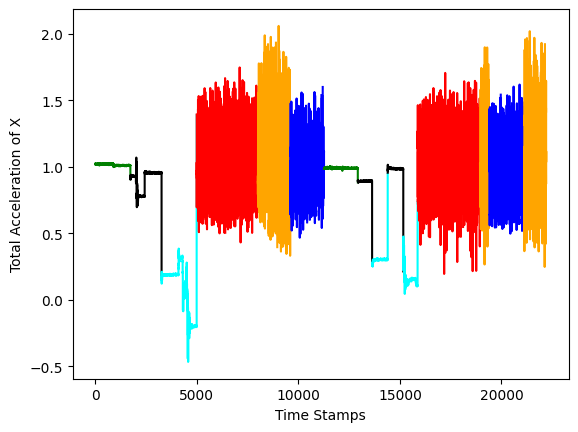

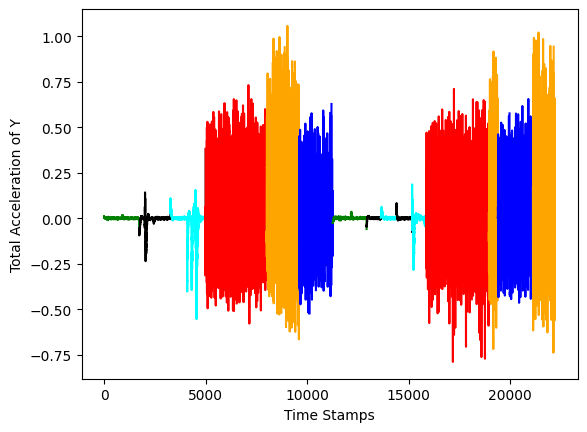

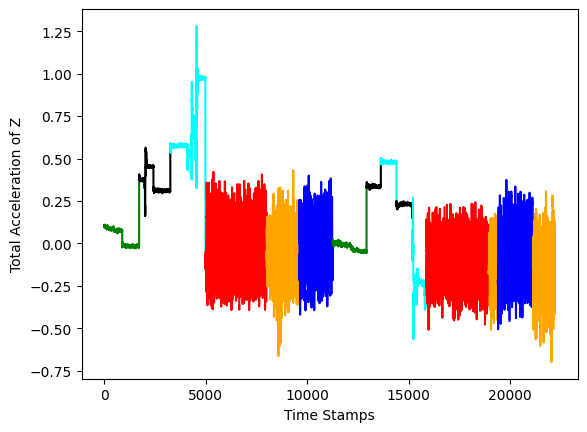

In [2]:
# Task 3.3
subject1Ind = subjectTrain.loc[subjectTrain[0] == 1]

bodyAx = np.zeros(shape=(347*64, 2))
bodyAy = np.zeros(shape=(347*64, 2))
bodyAz = np.zeros(shape=(347*64, 2))
bodyGx = np.zeros(shape=(347*64, 2))
bodyGy = np.zeros(shape=(347*64, 2))
bodyGz = np.zeros(shape=(347*64, 2))
totalAx = np.zeros(shape=(347*64, 2))
totalAy = np.zeros(shape=(347*64, 2))
totalAz = np.zeros(shape=(347*64, 2))

        # For bodyAx

for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            bodyAx[j+(i*64)][0] = bodyAccx[j][i]
            bodyAx[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            bodyAx[j+(i*64)][0] = bodyAccx[j][i]
            bodyAx[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            bodyAx[j+(i*64)][0] = bodyAccx[j][i]
            bodyAx[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            bodyAx[j+(i*64)][0] = bodyAccx[j][i]
            bodyAx[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            bodyAx[j+(i*64)][0] = bodyAccx[j][i]
            bodyAx[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            bodyAx[j+(i*64)][0] = bodyAccx[j][i]
            bodyAx[j+(i*64)][1] = 6
            
bodyAx = pd.DataFrame(bodyAx)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Body Acceleration of X")
for i in range(1, len(bodyAx), 64):
    if(bodyAx[1][i] == 1):
        plt.plot(bodyAx[0][i:i+64], color = 'red')
    if(bodyAx[1][i] == 2):
        plt.plot(bodyAx[0][i:i+64], color = 'blue')
    if(bodyAx[1][i] == 3):
        plt.plot(bodyAx[0][i:i+64], color = 'orange')
    if(bodyAx[1][i] == 4):
        plt.plot(bodyAx[0][i:i+64], color = 'black')
    if(bodyAx[1][i] == 5):
        plt.plot(bodyAx[0][i:i+64], color = 'green')
    if(bodyAx[1][i] == 6):
        plt.plot(bodyAx[0][i:i+64], color = 'cyan')

        # For bodyAy

for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            bodyAy[j+(i*64)][0] = bodyAccy[j][i]
            bodyAy[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            bodyAy[j+(i*64)][0] = bodyAccy[j][i]
            bodyAy[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            bodyAy[j+(i*64)][0] = bodyAccy[j][i]
            bodyAy[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            bodyAy[j+(i*64)][0] = bodyAccy[j][i]
            bodyAy[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            bodyAy[j+(i*64)][0] = bodyAccy[j][i]
            bodyAy[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            bodyAy[j+(i*64)][0] = bodyAccy[j][i]
            bodyAy[j+(i*64)][1] = 6
            
bodyAy = pd.DataFrame(bodyAy)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Body Acceleration of Y")
for i in range(1, len(bodyAy), 64):
    if(bodyAy[1][i] == 1):
        plt.plot(bodyAy[0][i:i+64], color = 'red')
    if(bodyAy[1][i] == 2):
        plt.plot(bodyAy[0][i:i+64], color = 'blue')
    if(bodyAy[1][i] == 3):
        plt.plot(bodyAy[0][i:i+64], color = 'orange')
    if(bodyAy[1][i] == 4):
        plt.plot(bodyAy[0][i:i+64], color = 'black')
    if(bodyAy[1][i] == 5):
        plt.plot(bodyAy[0][i:i+64], color = 'green')
    if(bodyAy[1][i] == 6):
        plt.plot(bodyAy[0][i:i+64], color = 'cyan')
        
        # For bodyAz
        
for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            bodyAz[j+(i*64)][0] = bodyAccz[j][i]
            bodyAz[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            bodyAz[j+(i*64)][0] = bodyAccz[j][i]
            bodyAz[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            bodyAz[j+(i*64)][0] = bodyAccz[j][i]
            bodyAz[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            bodyAz[j+(i*64)][0] = bodyAccz[j][i]
            bodyAz[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            bodyAz[j+(i*64)][0] = bodyAccz[j][i]
            bodyAz[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            bodyAz[j+(i*64)][0] = bodyAccz[j][i]
            bodyAz[j+(i*64)][1] = 6
            
bodyAz = pd.DataFrame(bodyAz)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Body Acceleration of Z")
for i in range(1, len(bodyAz), 64):
    if(bodyAz[1][i] == 1):
        plt.plot(bodyAz[0][i:i+64], color = 'red')
    if(bodyAz[1][i] == 2):
        plt.plot(bodyAz[0][i:i+64], color = 'blue')
    if(bodyAz[1][i] == 3):
        plt.plot(bodyAz[0][i:i+64], color = 'orange')
    if(bodyAz[1][i] == 4):
        plt.plot(bodyAz[0][i:i+64], color = 'black')
    if(bodyAz[1][i] == 5):
        plt.plot(bodyAx[0][i:i+64], color = 'green')
    if(bodyAz[1][i] == 6):
        plt.plot(bodyAz[0][i:i+64], color = 'cyan')
        
        # For bodyGx
        
for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            bodyGx[j+(i*64)][0] = bodyGyrox[j][i]
            bodyGx[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            bodyGx[j+(i*64)][0] = bodyGyrox[j][i]
            bodyGx[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            bodyGx[j+(i*64)][0] = bodyGyrox[j][i]
            bodyGx[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            bodyGx[j+(i*64)][0] = bodyGyrox[j][i]
            bodyGx[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            bodyGx[j+(i*64)][0] = bodyGyrox[j][i]
            bodyGx[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            bodyGx[j+(i*64)][0] = bodyGyrox[j][i]
            bodyGx[j+(i*64)][1] = 6


bodyGx = pd.DataFrame(bodyGx)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Body Gyro of X")
for i in range(1, len(bodyGx), 64):
    if(bodyAx[1][i] == 1):
        plt.plot(bodyGx[0][i:i+64], color = 'red')
    if(bodyAx[1][i] == 2):
        plt.plot(bodyGx[0][i:i+64], color = 'blue')
    if(bodyAx[1][i] == 3):
        plt.plot(bodyGx[0][i:i+64], color = 'orange')
    if(bodyAx[1][i] == 4):
        plt.plot(bodyGx[0][i:i+64], color = 'black')
    if(bodyAx[1][i] == 5):
        plt.plot(bodyGx[0][i:i+64], color = 'green')
    if(bodyAx[1][i] == 6):
        plt.plot(bodyGx[0][i:i+64], color = 'cyan')
     

        # For BodyGy 
        
for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            bodyGy[j+(i*64)][0] = bodyGyroy[j][i]
            bodyGy[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            bodyGy[j+(i*64)][0] = bodyGyroy[j][i]
            bodyGy[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            bodyGy[j+(i*64)][0] = bodyGyroy[j][i]
            bodyGy[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            bodyGy[j+(i*64)][0] = bodyGyroy[j][i]
            bodyGy[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            bodyGy[j+(i*64)][0] = bodyGyroy[j][i]
            bodyGy[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            bodyGy[j+(i*64)][0] = bodyGyroy[j][i]
            bodyGy[j+(i*64)][1] = 6
            
bodyGy = pd.DataFrame(bodyGy)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Body Gyro of Y")
for i in range(1, len(bodyGy), 64):
    if(bodyAx[1][i] == 1):
        plt.plot(bodyGy[0][i:i+64], color = 'red')
    if(bodyAx[1][i] == 2):
        plt.plot(bodyGy[0][i:i+64], color = 'blue')
    if(bodyAx[1][i] == 3):
        plt.plot(bodyGy[0][i:i+64], color = 'orange')
    if(bodyAx[1][i] == 4):
        plt.plot(bodyGy[0][i:i+64], color = 'black')
    if(bodyAx[1][i] == 5):
        plt.plot(bodyGy[0][i:i+64], color = 'green')
    if(bodyAx[1][i] == 6):
        plt.plot(bodyGy[0][i:i+64], color = 'cyan')
 
        # For bodyGz

for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            bodyGz[j+(i*64)][0] = bodyGyroz[j][i]
            bodyGz[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            bodyGz[j+(i*64)][0] = bodyGyroz[j][i]
            bodyGz[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            bodyGz[j+(i*64)][0] = bodyGyroz[j][i]
            bodyGz[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            bodyGz[j+(i*64)][0] = bodyGyroz[j][i]
            bodyGz[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            bodyGz[j+(i*64)][0] = bodyGyroz[j][i]
            bodyGz[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            bodyGz[j+(i*64)][0] = bodyGyroz[j][i]
            bodyGz[j+(i*64)][1] = 6
            
bodyGz = pd.DataFrame(bodyGz)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Body Gyro of Z")
for i in range(1, len(bodyGz), 64):
    if(bodyAx[1][i] == 1):
        plt.plot(bodyGz[0][i:i+64], color = 'red')
    if(bodyAx[1][i] == 2):
        plt.plot(bodyGz[0][i:i+64], color = 'blue')
    if(bodyAx[1][i] == 3):
        plt.plot(bodyGz[0][i:i+64], color = 'orange')
    if(bodyAx[1][i] == 4):
        plt.plot(bodyGz[0][i:i+64], color = 'black')
    if(bodyAx[1][i] == 5):
        plt.plot(bodyGz[0][i:i+64], color = 'green')
    if(bodyAx[1][i] == 6):
        plt.plot(bodyGz[0][i:i+64], color = 'cyan')

        # For totalAx
        
for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            totalAx[j+(i*64)][0] = totalAccx[j][i]
            totalAx[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            totalAx[j+(i*64)][0] = totalAccx[j][i]
            totalAx[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            totalAx[j+(i*64)][0] = totalAccx[j][i]
            totalAx[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            totalAx[j+(i*64)][0] = totalAccx[j][i]
            totalAx[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            totalAx[j+(i*64)][0] = totalAccx[j][i]
            totalAx[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            totalAx[j+(i*64)][0] = totalAccx[j][i]
            totalAx[j+(i*64)][1] = 6
            
totalAx = pd.DataFrame(totalAx)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Total Acceleration of X")
for i in range(1, len(totalAx), 64):
    if(bodyAx[1][i] == 1):
        plt.plot(totalAx[0][i:i+64], color = 'red')
    if(bodyAx[1][i] == 2):
        plt.plot(totalAx[0][i:i+64], color = 'blue')
    if(bodyAx[1][i] == 3):
        plt.plot(totalAx[0][i:i+64], color = 'orange')
    if(bodyAx[1][i] == 4):
        plt.plot(totalAx[0][i:i+64], color = 'black')
    if(bodyAx[1][i] == 5):
        plt.plot(totalAx[0][i:i+64], color = 'green')
    if(bodyAx[1][i] == 6):
        plt.plot(totalAx[0][i:i+64], color = 'cyan')
     
        # For totalAy

for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            totalAy[j+(i*64)][0] = bodyAccx[j][i]
            totalAy[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            totalAy[j+(i*64)][0] = bodyAccx[j][i]
            totalAy[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            totalAy[j+(i*64)][0] = bodyAccx[j][i]
            totalAy[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            totalAy[j+(i*64)][0] = bodyAccx[j][i]
            totalAy[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            totalAy[j+(i*64)][0] = bodyAccx[j][i]
            totalAy[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            totalAy[j+(i*64)][0] = bodyAccx[j][i]
            totalAy[j+(i*64)][1] = 6
            
totalAy = pd.DataFrame(totalAy)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Total Acceleration of Y")
for i in range(1, len(totalAy), 64):
    if(totalAy[1][i] == 1):
        plt.plot(totalAy[0][i:i+64], color = 'red')
    if(bodyAx[1][i] == 2):
        plt.plot(totalAy[0][i:i+64], color = 'blue')
    if(bodyAx[1][i] == 3):
        plt.plot(totalAy[0][i:i+64], color = 'orange')
    if(bodyAx[1][i] == 4):
        plt.plot(totalAy[0][i:i+64], color = 'black')
    if(bodyAx[1][i] == 5):
        plt.plot(totalAy[0][i:i+64], color = 'green')
    if(bodyAx[1][i] == 6):
        plt.plot(totalAy[0][i:i+64], color = 'cyan')
 
        # For totalAz
for i in range(len(subject1Ind)):
    for j in range(64):
        if(trainActivity[0][i] == 1):
            totalAz[j+(i*64)][0] = totalAccz[j][i]
            totalAz[j+(i*64)][1] = 1
        if(trainActivity[0][i] == 2):
            totalAz[j+(i*64)][0] = totalAccz[j][i]
            totalAz[j+(i*64)][1] = 2
        if(trainActivity[0][i] == 3):
            totalAz[j+(i*64)][0] = totalAccz[j][i]
            totalAz[j+(i*64)][1] = 3
        if(trainActivity[0][i] == 4):
            totalAz[j+(i*64)][0] = totalAccz[j][i]
            totalAz[j+(i*64)][1] = 4
        if(trainActivity[0][i] == 5):
            totalAz[j+(i*64)][0] = totalAccz[j][i]
            totalAz[j+(i*64)][1] = 5
        if(trainActivity[0][i] == 6):
            totalAz[j+(i*64)][0] = totalAccz[j][i]
            totalAz[j+(i*64)][1] = 6
            
totalAz = pd.DataFrame(totalAz)
plt.figure()
plt.xlabel("Time Stamps")
plt.ylabel("Total Acceleration of Z")
for i in range(1, len(totalAz), 64):
    if(bodyAx[1][i] == 1):
        plt.plot(totalAz[0][i:i+64], color = 'red')
    if(bodyAx[1][i] == 2):
        plt.plot(totalAz[0][i:i+64], color = 'blue')
    if(bodyAx[1][i] == 3):
        plt.plot(totalAz[0][i:i+64], color = 'orange')
    if(bodyAx[1][i] == 4):
        plt.plot(totalAz[0][i:i+64], color = 'black')
    if(bodyAx[1][i] == 5):
        plt.plot(totalAz[0][i:i+64], color = 'green')
    if(bodyAx[1][i] == 6):
        plt.plot(totalAz[0][i:i+64], color = 'cyan')


In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN
def rnnDef(units):
    model = Sequential()
    model.add(SimpleRNN(20, input_shape = (64,9)))
    model.add(Dense(units, activation = 'relu'))
    model.add(Dense(6, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
kf = KFold(n_splits=5)
clf = KerasClassifier(rnnDef, units = 15, verbose = 0)
y_train_cat = tf.keras.utils.to_categorical(trainy-1, num_classes = 6)
epochs = [5, 10]
units = [20, 30, 40]
param_grid = dict(units = units, epochs = epochs)
grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = kf)
grid_result = grid.fit(trainx[:,:64,:], y_train_cat)
res = pd.DataFrame(grid_result.cv_results_); 
print('\nTest Accuracies')
for i in range(0,6):
    print('Accuracy for epochs = '+str(res.param_epochs[i])+' units = '+str(res.param_units[i]))
    print('split 1 = '+str(res.split0_test_score[i]))
    print('split 2 = '+str(res.split1_test_score[i]))
    print('split 3 = '+str(res.split2_test_score[i]))
    print('split 4 = '+str(res.split3_test_score[i]))
    print('split 5 = '+str(res.split4_test_score[i]))
print('\n')
    

In [ ]:
from tensorflow.keras.layers import LSTM
def lstmDEF(units):
    model = Sequential()
    model.add(LSTM(20, input_shape = (64,9)))
    model.add(Dense(units, activation = 'relu'))
    model.add(Dense(6, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
kf = KFold(n_splits=5)
clf = KerasClassifier(lstmDEF, units = 15, verbose = 0)
y_train_cat = tf.keras.utils.to_categorical(trainy-1, num_classes = 6)
epochs = [5, 10]
units = [20, 30, 40]
param_grid = dict(units = units, epochs = epochs)
grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = kf)
grid_result = grid.fit(trainx[:,:64,:], y_train_cat)
res = pd.DataFrame(grid_result.cv_results_); 
print('\nTest Accuracies')
for i in range(0,6):
    print('Accuracy for epochs = '+str(res.param_epochs[i])+' units = '+str(res.param_units[i]))
    print('split 1 = '+str(res.split0_test_score[i]))
    print('split 2 = '+str(res.split1_test_score[i]))
    print('split 3 = '+str(res.split2_test_score[i]))
    print('split 4 = '+str(res.split3_test_score[i]))
    print('split 5 = '+str(res.split4_test_score[i]))
print('\n')
    

In [ ]:
from tensorflow.keras.layers import Bidirectional
def bilstmDEF(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape = (64,9)))
    model.add(Dense(units, activation = 'relu'))
    model.add(Dense(6, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
kf = KFold(n_splits=5)
clf = KerasClassifier(bilstmDEF, units = 15, verbose = 0)
y_train_cat = tf.keras.utils.to_categorical(trainy-1, num_classes = 6)
epochs = [3, 5]
units = [20, 30, 40]
param_grid = dict(units = units, epochs = epochs)
grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = kf, error_score = 'raise')
grid_result = grid.fit(trainx[:,:64,:], y_train_cat)
res = pd.DataFrame(grid_result.cv_results_); 
print('\nTest Accuracies')
for i in range(0,6):
    print('Accuracy for epochs = '+str(res.param_epochs[i])+' units = '+str(res.param_units[i]))
    print('split 1 = '+str(res.split0_test_score[i]))
    print('split 2 = '+str(res.split1_test_score[i]))
    print('split 3 = '+str(res.split2_test_score[i]))
    print('split 4 = '+str(res.split3_test_score[i]))
    print('split 5 = '+str(res.split4_test_score[i]))
print('\n')
    